In [101]:
# Essential imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
House_df = pd.read_csv ("C:/Users/USER/Documents/Python Scripts/Housing.csv")

In [12]:
House_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
print("column in House_df:", House_df.columns)

column in House_df: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [30]:
#Data Modelling- Convert categorical variables to numeric binary  (0 = no, 1 = yes)

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_cols:
    House_df[col] = House_df[col].map({'yes': 1, 'no': 0})



In [32]:
House_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [48]:
House_df.colums()

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')

In [59]:
from sklearn.model_selection import train_test_split

# Define features and target
X = House_df.drop('price', axis=1)
y = House_df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm
print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)


Training shape: (436, 13)
Test shape: (109, 13)


In [79]:
#To predict house prices using linear regression and evaluate how well the model performs using different metrics and visualization.

from sklearn.linear_model import LinearRegression

# activating the model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [87]:
# R-squared: How well the model explains the variation in price
r2 = r2_score(y_test, y_pred)

print(f"R² (R-squared): {r2:.4f}")

R² (R-squared): 0.6529


In [93]:
# MAE: Average or mean absolute error
mae = mean_absolute_error(y_test, y_pred)

print(f"MAE (Mean Absolute Error): {mae:.2f}")

MAE (Mean Absolute Error): 970043.40


In [99]:
# RMSE: Root Mean Squared Error (more sensitive to big errors)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")

RMSE (Root Mean Squared Error): 1324506.96


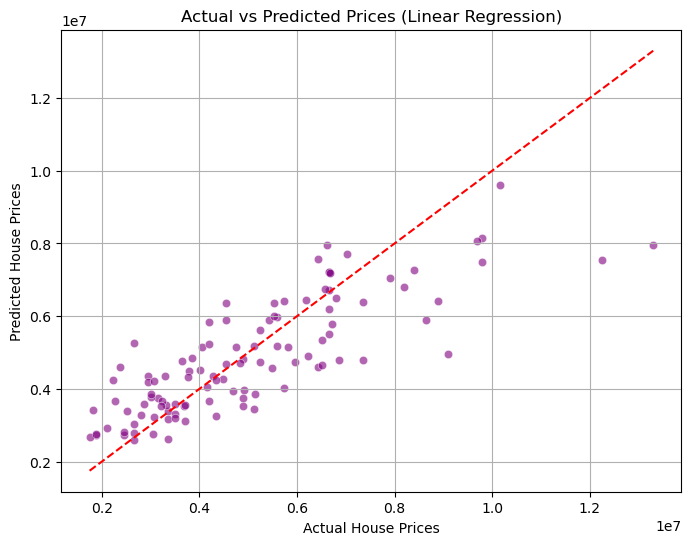

In [103]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.6)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # ideal line
plt.grid(True)
plt.show()

In [105]:
# the model is learning the general trend but missing fine-grained accuracy.and Errors grow for more expensive homes.
# The model explains ~65% of the variance in house prices. It's decent, but there's room for improvement. |On average, the model is off by about ₦970k in predictions. |
# Errors are larger when squared. This shows some big prediction errors exist (outliers)

# We need to try **more powerful models**, like **Random Forest**, to better capture complex patterns.

In [117]:
from sklearn.ensemble import RandomForestRegressor

#activating the randomForest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# let teach the model now
rf_model.fit(X_train, y_train)

#make prediction let c what you got 
rf_predictions = rf_model.predict(X_test)


In [119]:
print(rf_predictions[:10]) 

[5368580.   7270270.   3751028.75 4493790.   3751650.   3440360.
 5092920.   5063730.   2575090.   2873276.  ]


In [121]:
# R-squared
r2_rf = r2_score(y_test, rf_predictions)

print(f"R² (R-squared): {r2_rf:.4f}")

R² (R-squared): 0.6114


In [123]:
# MAE
mae_rf = mean_absolute_error(y_test, rf_predictions)

print(f"MAE (Mean Absolute Error): {mae_rf:,.2f}")

MAE (Mean Absolute Error): 1,022,560.05


In [125]:
# RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))

print(f"RMSE (Root Mean Squared Error): {rmse_rf:,.2f}")

RMSE (Root Mean Squared Error): 1,401,496.84


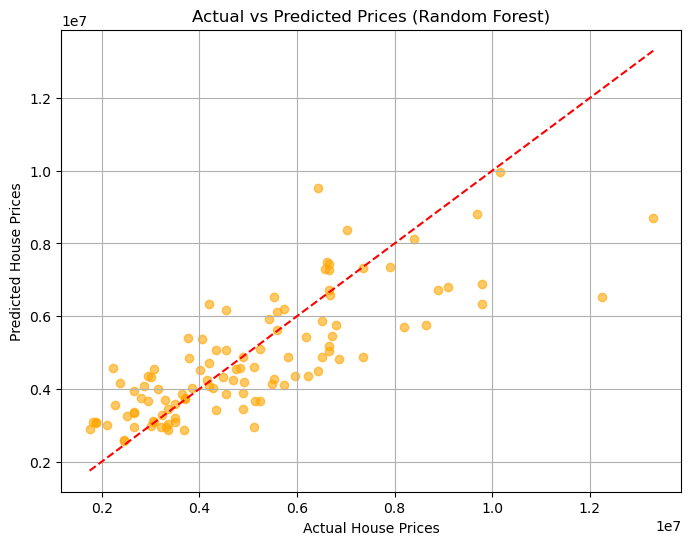

In [129]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, rf_predictions, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.grid(True)
plt.show()

In [ ]:
## Model Comparison Summary

# After evaluating both Linear Regression and Random Forest Regressor:

# Linear Regression** had better performance in R² and error metrics.
# Random Forest might be underperforming due to:
# Small dataset size
# Lack of hyperparameter tuning
# Possibly noisy or unscaled data


# let try other models like Gradient Boosting 



In [131]:
from sklearn.ensemble import GradientBoostingRegressor

In [133]:
# Activating model

gb_model = GradientBoostingRegressor(random_state=42)

In [135]:
#teach the mdel

# Fit to training data
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [141]:
# Predict
gb_predictions = gb_model.predict(X_test)


print(gb_predictions[:10]) 

[4486984.35601967 7208750.95765462 3693243.50703918 4439761.73364167
 3739117.80400389 3908167.73490597 6154987.05709327 5864341.77465772
 3140942.70728673 3094515.49493127]


In [143]:
# Model Evaluation

r2_gb = r2_score(y_test, gb_predictions)
mae_gb = mean_absolute_error(y_test, gb_predictions)
rmse_gb = np.sqrt(mean_squared_error(y_test, gb_predictions))

In [145]:
print(f"R² (Gradient Boosting): {r2_gb:.4f}")
print(f"MAE: {mae_gb:,.2f}")
print(f"RMSE: {rmse_gb:,.2f}")

R² (Gradient Boosting): 0.6658
MAE: 960,578.78
RMSE: 1,299,761.15


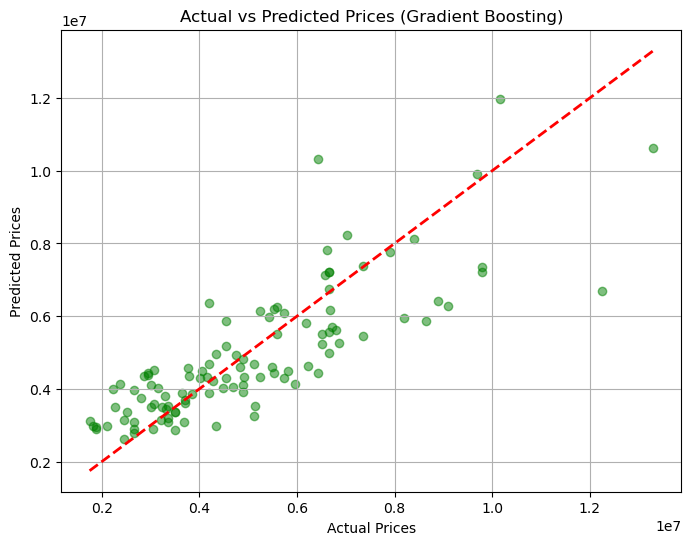

In [147]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, gb_predictions, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Gradient Boosting)')
plt.grid(True)
plt.show()

In [ ]:
# Now i want to Tune Gradient Boosting Regressor using GridSearchCV,
# We want to test different settings (called hyperparameters) to find the best combo for the model to perform better.

In [151]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV is the tool that helps us test different settings automatically and pick the best one based on performance 

In [153]:
param_grid = {
    'n_estimators': [100, 200],           
    'learning_rate': [0.05, 0.1, 0.2],    
    'max_depth': [3, 5],                  
    'min_samples_split': [2, 5],         
    'min_samples_leaf': [1, 3]         
}

In [162]:
gb_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV (
    estimator=gb_model,    
    param_grid=param_grid,   
    cv=5,                   
    scoring='r2',            
    n_jobs=-1,               
    verbose=2  )

In [164]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 5],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [166]:
best_gb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [170]:
# Use the best model to make predictions
tuned_predictions = best_gb_model.predict(X_test)

print(tuned_predictions[:10]) 

[5222151.68526607 7520485.52463869 3644834.00568169 4226190.96891446
 4140514.03896046 3501044.39228505 5544770.831936   5079713.74492924
 3085669.53144642 3058979.15488808]


In [178]:
# let evaluate tune gb model performance 

r2_tuned = r2_score(y_test, tuned_predictions)

print(f" Tuned R²: {r2_tuned:.4f}")

 Tuned R²: 0.6267


In [180]:
mae_tuned = mean_absolute_error(y_test, tuned_predictions)

print(f" Tuned MAE: {mae_tuned:,.2f}")

 Tuned MAE: 1,016,803.60


In [182]:
rmse_tuned = np.sqrt(mean_squared_error(y_test, tuned_predictions))

print(f" Tuned RMSE: {rmse_tuned:,.2f}")

 Tuned RMSE: 1,373,683.32


In [ ]:
 #  our best model so far was raw Gradient Boosting before tuning.
# It had the highest R² and lowest MAE & RMSE.

# The tuned model didn't improve the performance — in fact, the metrics got slightly worse.

# It happens! GridSearch tries its best, but sometimes the default is better — especially with smaller datasets.
# The untuned Gradient Boosting Regressor is the best model for this project. It gives the most accurate predictions with the least error.

In [186]:
# Get feature importances from the raw GB model
feature_importances = best_gb_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})


In [188]:
# Sort by most important
features_df = features_df.sort_values(by='Importance', ascending=False)

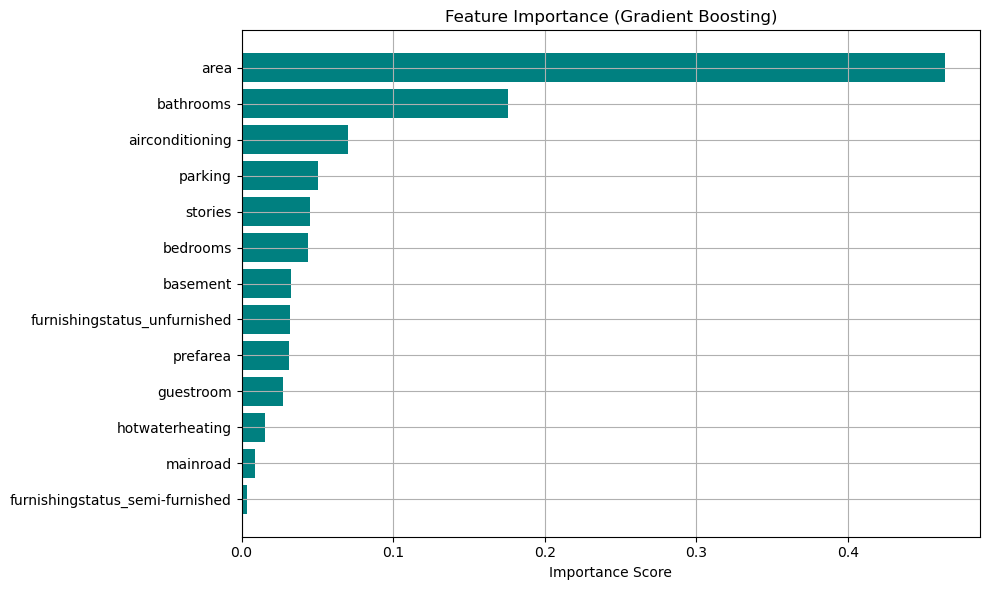

In [190]:
# Plot
plt.figure(figsize=(10, 6))

plt.barh(features_df['Feature'], features_df['Importance'], color='teal')
plt.xlabel('Importance Score')
plt.title('Feature Importance (Gradient Boosting)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
area
bathrooms
airconditions
parking

the least below is 
funishingstatus_semi-furnished